In [3]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:
data = {'A': [1, 2, None, 4], 'B': [None, 2, 3, 4]}
df = pd.DataFrame(data)
df_drop_rows = df.dropna(axis =0)
df_drop_rows

,A,B
1,2.0,2.0
3,4.0,4.0


In [4]:
df_drop_col = df.dropna(axis = 1)
df_drop_col

""
0
1
2
3


In [5]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy = 'mean')
df_mean = mean_imputer.fit_transform(df)
df_mean = pd.DataFrame(df_mean,columns = df.columns)
df_mean

,A,B
0,1.000000,3.0
1,2.000000,2.0
2,2.333333,3.0
3,4.000000,4.0


In [14]:
df['A'] = df['A'].interpolate()
df

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,4.0,4.0


In [22]:
df = pd.DataFrame({'A':[1,5,None,10,'NaN',10,'NAN']})
df

,A
0,1
1,5
2,None
3,10
4,NaN
5,10
6,NAN


In [25]:
df['A'] = df['A'].replace(['NaN','NAN'],np.nan)
df

,A
0,1.0
1,5.0
2,NaN
3,10.0
4,NaN
5,10.0
6,NaN


In [26]:
import pandas as pd
import numpy as np

# Create a DataFrame with None, np.nan, and empty strings
df = pd.DataFrame({
    'A': [1, None, 3, '', 5],
    'B': [None, 2, 3, 4, ''],
    'C': [5, 6, np.nan, 8, 9]
})

print("Original DataFrame:")
print(df)

# Check for empty cells
empty_check = df.isnull() | (df == '')
print("\nEmpty Cell Check (True indicates an empty cell):")
print(empty_check)


Original DataFrame:
      A     B    C
0     1  None  5.0
1  None     2  6.0
2     3     3  NaN
3           4  8.0
4     5        9.0

Empty Cell Check (True indicates an empty cell):
       A      B      C
0  False   True  False
1   True  False  False
2  False  False   True
3   True  False  False
4  False   True  False


In [28]:
df['A'].replace("",np.nan,inplace =True)

In [29]:
df['A'] = df['A'].fillna(df['A'].mean())
df

,A,B,C
0,1.0,None,5.0
1,3.0,2,6.0
2,3.0,3,NaN
3,3.0,4,8.0
4,5.0,,9.0


In [30]:
data = {
    'A': [1, 2, None, 4, 5, '', 7, np.nan, 9, 10],
    'B': [None, 2, 3, '', 5, 6, 7, 8, np.nan, 10],
    'C': [5, np.nan, 3, None, '', 6, 1, 8, 9, 10],
    'D': ['foo', 'bar', 'baz', None, 'qux', 'quux', '', 'corge', 'grault', 'garply']
}

# Create the DataFrame
df = pd.DataFrame(data)
df

,A,B,C,D
0,1,None,5,foo
1,2,2,NaN,bar
2,None,3,3,baz
3,4,,None,None
4,5,5,,qux
5,,6,6,quux
6,7,7,1,
7,NaN,8,8,corge
8,9,NaN,9,grault
9,10,10,10,garply


In [32]:
from sklearn.impute import KNNImputer

In [33]:
knn_imp = KNNImputer(n_neighbors = 3)


In [38]:
df.replace('',np.nan,inplace =True)

In [39]:
df

,A,B,C,D
0,1.0,NaN,5.0,foo
1,2.0,2.0,NaN,bar
2,NaN,3.0,3.0,baz
3,4.0,NaN,NaN,None
4,5.0,5.0,NaN,qux
5,NaN,6.0,6.0,quux
6,7.0,7.0,1.0,NaN
7,NaN,8.0,8.0,corge
8,9.0,NaN,9.0,grault
9,10.0,10.0,10.0,garply


In [42]:
df[['A','B','C']] = knn_imp.fit_transform(df[['A','B','C']])
df

,A,B,C,D
0,1.000000,3.666667,5.000000,foo
1,2.000000,2.000000,4.666667,bar
2,2.666667,3.000000,3.000000,baz
3,4.000000,4.666667,5.000000,None
4,5.000000,5.000000,3.333333,qux
5,5.000000,6.000000,6.000000,quux
6,7.000000,7.000000,1.000000,NaN
7,8.000000,8.000000,8.000000,corge
8,9.000000,8.000000,9.000000,grault
9,10.000000,10.000000,10.000000,garply


In [43]:
df['D'] = df['D'].fillna(df['D'].mode()[0])
df

,A,B,C,D
0,1.000000,3.666667,5.000000,foo
1,2.000000,2.000000,4.666667,bar
2,2.666667,3.000000,3.000000,baz
3,4.000000,4.666667,5.000000,bar
4,5.000000,5.000000,3.333333,qux
5,5.000000,6.000000,6.000000,quux
6,7.000000,7.000000,1.000000,bar
7,8.000000,8.000000,8.000000,corge
8,9.000000,8.000000,9.000000,grault
9,10.000000,10.000000,10.000000,garply


In [7]:
data = {
    'Numeric': [1, 2, np.nan, 4, 5, np.nan, 7],
    'Categorical': ['A', 'B', np.nan, 'B', 'A', 'A', np.nan],
    'Target': [1, 0, 1, 0, 1, 1, 0]
}
df = pd.DataFrame(data)

print("Initial DataFrame:")
print(df)

Initial DataFrame:
   Numeric Categorical  Target
0      1.0           A       1
1      2.0           B       0
2      NaN         NaN       1
3      4.0           B       0
4      5.0           A       1
5      NaN           A       1
6      7.0         NaN       0


In [8]:
mean_imputer = SimpleImputer(strategy = 'mean')
df['Numeric'] = mean_imputer.fit_transform(df[['Numeric']])
df

NameError: name 'SimpleImputer' is not defined

In [ ]:
#df['Numeric'] = df['Numeric'].fillna(method = 'ffill')
#df['Numeric'] = df['Numeric'].fillna(method = 'bfill')
#df['Numeric'] = df['Numeric'].interpolate(method = 'linear')

In [5]:
from sklearn.impute import KNNImputer
knnimputer = KNNImputer(n_neighbors = 3)
df['Numeric'] = knnimputer.fit_transform(df[['Numeric']])
df

,Numeric,Categorical,Target
0,1.0,A,1
1,2.0,B,0
2,3.8,NaN,1
3,4.0,B,0
4,5.0,A,1
5,3.8,A,1
6,7.0,NaN,0


# Encoding

In [17]:
data = {
    'Numeric': [1.0, 2.0, 3.8, 4.0, 5.0, 3.8, 7.0],
    'Categorical': ['A', 'B', None, 'B', 'A', 'A', None],
    'Target': [1, 0, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)
df

,Numeric,Categorical,Target
0,1.0,A,1
1,2.0,B,0
2,3.8,None,1
3,4.0,B,0
4,5.0,A,1
5,3.8,A,1
6,7.0,None,0


In [19]:
df['Categorical'] = df['Categorical'].fillna(df['Categorical'].mode()[0])
df

,Numeric,Categorical,Target
0,1.0,A,1
1,2.0,B,0
2,3.8,A,1
3,4.0,B,0
4,5.0,A,1
5,3.8,A,1
6,7.0,A,0


## Label Encoding

In [29]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [23]:
ohe = OneHotEncoder(sparse = False)
ohe_encoded = ohe.fit_transform(df[['Categorical']])
ohe_encoded

C:\Users\achyu\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [24]:
enco_df = pd.DataFrame(ohe_encoded, columns = ohe.get_feature_names_out(['Categorical']))
enco_df

,Categorical_A,Categorical_B
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0


In [28]:
final_df = pd.concat([df.drop(columns  = ['Categorical']),enco_df],axis = 1)
final_df

,Numeric,Target,Categorical_A,Categorical_B
0,1.0,1,1.0,0.0
1,2.0,0,0.0,1.0
2,3.8,1,1.0,0.0
3,4.0,0,0.0,1.0
4,5.0,1,1.0,0.0
5,3.8,1,1.0,0.0
6,7.0,0,1.0,0.0


In [32]:
data = {
    'Numeric': [1.0, 2.0, 3.8, 4.0, 5.0, 3.8, 7.0],
    'Categorical': ['A', 'B', None, 'B', 'A', 'A', None],
    'Target': [1, 0, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)
df

,Numeric,Categorical,Target
0,1.0,A,1
1,2.0,B,0
2,3.8,None,1
3,4.0,B,0
4,5.0,A,1
5,3.8,A,1
6,7.0,None,0


In [33]:
le = LabelEncoder()
df['Categorical'] = le.fit_transform(df['Categorical'])
df

,Numeric,Categorical,Target
0,1.0,0,1
1,2.0,1,0
2,3.8,2,1
3,4.0,1,0
4,5.0,0,1
5,3.8,0,1
6,7.0,2,0


In [44]:
df = pd.get_dummies(df,columns = ['D'])
df

,A,B,C,D_bar,D_baz,D_corge,D_foo,D_garply,D_grault,D_quux,D_qux
0,1.000000,3.666667,5.000000,0,0,0,1,0,0,0,0
1,2.000000,2.000000,4.666667,1,0,0,0,0,0,0,0
2,2.666667,3.000000,3.000000,0,1,0,0,0,0,0,0
3,4.000000,4.666667,5.000000,1,0,0,0,0,0,0,0
4,5.000000,5.000000,3.333333,0,0,0,0,0,0,0,1
5,5.000000,6.000000,6.000000,0,0,0,0,0,0,1,0
6,7.000000,7.000000,1.000000,1,0,0,0,0,0,0,0
7,8.000000,8.000000,8.000000,0,0,1,0,0,0,0,0
8,9.000000,8.000000,9.000000,0,0,0,0,0,1,0,0
9,10.000000,10.000000,10.000000,0,0,0,0,1,0,0,0


In [45]:
df = pd.DataFrame({'a':['AP','TN','KN']})
df['a'] = df['a'].astype('category')
df['a'] = df['a'].cat.codes

In [46]:
df

,a
0,0
1,2
2,1


In [48]:
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame({'a':['AP','TN','KN']})
le = LabelEncoder()
df['a'] = le.fit_transform(df['a'])
df

,a
0,0
1,2
2,1


In [51]:
from sklearn.preprocessing import OrdinalEncoder
df = pd.DataFrame({'a':['Low', 'Medium', 'High']})
oe = OrdinalEncoder()
df['a'] = oe.fit_transform(df[['a']])
df

,a
0,1.0
1,2.0
2,0.0


In [35]:
import pandas as pd
import category_encoders as ce

# Create a sample DataFrame
df = pd.DataFrame({'category': ['A', 'B', 'C', 'A', 'B', 'C','D','E','F','G']})

# Initialize Binary Encoder
binary_encoder = ce.BinaryEncoder(cols=['category'])

# Perform binary encoding
binary_encoded_df = binary_encoder.fit_transform(df)

print(binary_encoded_df)


   category_0  category_1  category_2
0           0           0           1
1           0           1           0
2           0           1           1
3           0           0           1
4           0           1           0
5           0           1           1
6           1           0           0
7           1           0           1
8           1           1           0
9           1           1           1


In [53]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a sample DataFrame
df = pd.DataFrame({'category': ['A', 'B', 'C', 'A', 'B', 'C']})

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding
one_hot_encoded = encoder.fit_transform(df[['category']])

# Convert to DataFrame and combine with original
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['category']))
final_df = pd.concat([df, one_hot_df], axis=1).drop('category', axis=1)

print(final_df)


   category_A  category_B  category_C
0         1.0         0.0         0.0
1         0.0         1.0         0.0
2         0.0         0.0         1.0
3         1.0         0.0         0.0
4         0.0         1.0         0.0
5         0.0         0.0         1.0


C:\Users\achyu\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [58]:
# Sample DataFrame with target variable
df = pd.DataFrame({
    'City': ['NY', 'LA', 'NY', 'LA', 'NY'],
    'Sales': [100, 200, 150, 300, 250]
})

# Calculate mean sales per city
mean_encoded = df.groupby('City')['Sales'].mean().to_dict()
df['City_Encoded'] = df['City'].map(mean_encoded)
print(df)

  City  Sales  City_Encoded
0   NY    100    166.666667
1   LA    200    250.000000
2   NY    150    166.666667
3   LA    300    250.000000
4   NY    250    166.666667


{'LA': 250.0, 'NY': 166.66666666666666}

In [59]:
import category_encoders as ce   # Binary Encdoing

# Sample DataFrame
df = pd.DataFrame({'Category': ['A', 'B', 'C', 'D']})

# Binary Encoding
binary_encoder = ce.BinaryEncoder(cols=['Category'])
df_encoded = binary_encoder.fit_transform(df)
print(df_encoded)


   Category_0  Category_1  Category_2
0           0           0           1
1           0           1           0
2           0           1           1
3           1           0           0


In [60]:
# Sample DataFrame
df = pd.DataFrame({'Animal': ['Dog', 'Cat', 'Dog', 'Bird', 'Cat']})

# Frequency Encoding
frequency_encoded = df['Animal'].value_counts().to_dict()
df['Animal_Encoded'] = df['Animal'].map(frequency_encoded)
print(df)


  Animal  Animal_Encoded
0    Dog               2
1    Cat               2
2    Dog               2
3   Bird               1
4    Cat               2


In [39]:
import math
math.ln(100)

AttributeError: module 'math' has no attribute 'ln'

In [65]:
bin(1)

'0b1'

In [68]:
# Sample DataFrame with a target variable
df = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'] * 25,
    'Target': [1, 0, 1, 0] * 25
})

# Calculate mean target per category
mean_encoded = df.groupby('Category')['Target'].mean()
# df['Category_Encoded'] = df['Category'].map(mean_encoded)
mean_encoded

Category
A    1.0
B    0.0
C    1.0
D    0.0
Name: Target, dtype: float64

In [67]:
# Sample DataFrame with a target variable
df = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'] * 25,
    'Target': [1, 0, 1, 0] * 25
})

# Calculate mean target per category
mean_encoded = df.groupby('Category')['Target'].mean().to_dict()
df['Category_Encoded'] = df['Category'].map(mean_encoded)
df

,Category,Target,Category_Encoded
0,A,1,1.0
1,B,0,0.0
2,C,1,1.0
3,D,0,0.0
4,A,1,1.0
...,...,...,...
95,D,0,0.0
96,A,1,1.0
97,B,0,0.0
98,C,1,1.0


# Outlier Treatment

In [40]:
outliers_data = {
    'Values': [10, 12, 12, 13, 14, 13, 12, 100, 12, 14, -50, 15, 13]
}
outliers_df = pd.DataFrame(outliers_data)

print("Initial Data:")
print(outliers_df)

Initial Data:
    Values
0       10
1       12
2       12
3       13
4       14
5       13
6       12
7      100
8       12
9       14
10     -50
11      15
12      13


## Z -score

In [42]:
outliers_df['zscore'] = (outliers_df['Values'] - outliers_df['Values'].mean())/outliers_df['Values'].std()
outliers_df

,Values,zscore
0,10,-0.148941
1,12,-0.084400
2,12,-0.084400
3,13,-0.052129
4,14,-0.019859
5,13,-0.052129
6,12,-0.084400
7,100,2.755409
8,12,-0.084400
9,14,-0.019859


In [43]:
outliers_df['is_zscore'] = outliers_df['zscore'].apply(lambda x:abs(x)>3)
outliers_df

,Values,zscore,is_zscore
0,10,-0.148941,False
1,12,-0.084400,False
2,12,-0.084400,False
3,13,-0.052129,False
4,14,-0.019859,False
5,13,-0.052129,False
6,12,-0.084400,False
7,100,2.755409,False
8,12,-0.084400,False
9,14,-0.019859,False


## IQR

In [44]:
outliers_data = {
    'Values': [10, 12, 12, 13, 14, 13, 12, 100, 12, 14, -50, 15, 13]
}
outliers_df = pd.DataFrame(outliers_data)

print("Initial Data:")
print(outliers_df)

Initial Data:
    Values
0       10
1       12
2       12
3       13
4       14
5       13
6       12
7      100
8       12
9       14
10     -50
11      15
12      13


In [48]:
q1 = outliers_df['Values'].quantile(0.25)
q3 = outliers_df['Values'].quantile(0.75)
iqr = q3 -q1
upper_q = q3 +1.5*iqr
lower_q = q1-1.5*iqr
outliers_df['Is_Outlier_IQR'] = ((outliers_df['Values'] >upper_q) | (outliers_df['Values'] < lower_q)) 
outliers_df

,Values,Is_Outlier_IQR
0,10,False
1,12,False
2,12,False
3,13,False
4,14,False
5,13,False
6,12,False
7,100,True
8,12,False
9,14,False


##  3. Modified Z-Score Method

In [58]:
outliers_data = {
    'Values': [10, 12, 12, 13, 14, 13, 12, 100, 12, 14, -50, 15, 13]
}
outliers_df = pd.DataFrame(outliers_data)

print("Initial Data:")
print(outliers_df)

Initial Data:
    Values
0       10
1       12
2       12
3       13
4       14
5       13
6       12
7      100
8       12
9       14
10     -50
11      15
12      13


In [60]:
median = outliers_df['Values'].median()
mad = (outliers_df['Values'] - median).abs().median()
outliers_df['mod_zscore'] = 0.6745 * (outliers_df['Values'] - median)/mad
outliers_df['is_zscore'] = outliers_df['mod_zscore'].apply(lambda x:abs(x)>3.5)
outliers_df

,Values,mod_zscore,is_zscore
0,10,-2.0235,False
1,12,-0.6745,False
2,12,-0.6745,False
3,13,0.0000,False
4,14,0.6745,False
5,13,0.0000,False
6,12,-0.6745,False
7,100,58.6815,True
8,12,-0.6745,False
9,14,0.6745,False


## Isolation Forest

In [63]:
from sklearn.ensemble import IsolationForest

In [64]:
outliers_data = {
    'Values': [10, 12, 12, 13, 14, 13, 12, 100, 12, 14, -50, 15, 13]
}
outliers_df = pd.DataFrame(outliers_data)

print("Initial Data:")
print(outliers_df)

Initial Data:
    Values
0       10
1       12
2       12
3       13
4       14
5       13
6       12
7      100
8       12
9       14
10     -50
11      15
12      13


In [66]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers_df['Is_Outlier_IF'] = iso_forest.fit_predict(outliers_df[['Values']]) == -1
outliers_df


C:\Users\achyu\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Values,Is_Outlier_IF
0,10,False
1,12,False
2,12,False
3,13,False
4,14,False
5,13,False
6,12,False
7,100,True
8,12,False
9,14,False


# Features Scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer,RobustScaler

In [83]:
scaling_data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [100, 200, 300, 400, 500],
    'Feature3': [50, 30, 20, 40, 10]
}
scaling_df = pd.DataFrame(scaling_data)

print("Initial Data:")
print(scaling_df)

Initial Data:
   Feature1  Feature2  Feature3
0         1       100        50
1         2       200        30
2         3       300        20
3         4       400        40
4         5       500        10


## 1. MinMaxScaler

In [84]:
mms = MinMaxScaler()

scaling_df1 = mms.fit_transform(scaling_df)
scaling_df2 = pd.DataFrame(data = scaling_df1,columns = scaling_df.columns)
scaling_df2

,Feature1,Feature2,Feature3
0,0.00,0.00,1.00
1,0.25,0.25,0.50
2,0.50,0.50,0.25
3,0.75,0.75,0.75
4,1.00,1.00,0.00


## 2. Standardization (Z-Score Normalization)

In [85]:
scaling_data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [100, 200, 300, 400, 500],
    'Feature3': [50, 30, 20, 40, 10]
}
scaling_df = pd.DataFrame(scaling_data)

print("Initial Data:")
print(scaling_df)

Initial Data:
   Feature1  Feature2  Feature3
0         1       100        50
1         2       200        30
2         3       300        20
3         4       400        40
4         5       500        10


In [86]:
standard_scaler = StandardScaler()
scaling_df['Standardized_Feature1'] = standard_scaler.fit_transform(scaling_df[['Feature1']])
scaling_df['Standardized_Feature2'] = standard_scaler.fit_transform(scaling_df[['Feature2']])
scaling_df

,Feature1,Feature2,Feature3,Standardized_Feature1,Standardized_Feature2
0,1,100,50,-1.414214,-1.414214
1,2,200,30,-0.707107,-0.707107
2,3,300,20,0.000000,0.000000
3,4,400,40,0.707107,0.707107
4,5,500,10,1.414214,1.414214


## Normalization

In [87]:
normalizer = Normalizer()
scaling_df['Unit_Vector_Scaled'] = normalizer.fit_transform(scaling_df[['Feature1', 'Feature2', 'Feature3']])[:, 0]
scaling_df

,Feature1,Feature2,Feature3,Standardized_Feature1,Standardized_Feature2,Unit_Vector_Scaled
0,1,100,50,-1.414214,-1.414214,0.008944
1,2,200,30,-0.707107,-0.707107,0.009889
2,3,300,20,0.000000,0.000000,0.009977
3,4,400,40,0.707107,0.707107,0.009950
4,5,500,10,1.414214,1.414214,0.009998


## 4. Robust Scaling

In [89]:

robust_scaler = RobustScaler()
scaling_df['Robust_Scaled_Feature1'] = robust_scaler.fit_transform(scaling_df[['Feature1']])
scaling_df['Robust_Scaled_Feature2'] = robust_scaler.fit_transform(scaling_df[['Feature2']])
scaling_df

,Feature1,Feature2,Feature3,Standardized_Feature1,Standardized_Feature2,Unit_Vector_Scaled,Robust_Scaled_Feature1,Robust_Scaled_Feature2
0,1,100,50,-1.414214,-1.414214,0.008944,-1.0,-1.0
1,2,200,30,-0.707107,-0.707107,0.009889,-0.5,-0.5
2,3,300,20,0.000000,0.000000,0.009977,0.0,0.0
3,4,400,40,0.707107,0.707107,0.009950,0.5,0.5
4,5,500,10,1.414214,1.414214,0.009998,1.0,1.0


## Class Balancing

In [90]:
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN

## SMOTE

In [97]:
x = [[i] for i in range(10)]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # Balanced dataset: 5 class 0, 5 class 1
y_imbalanced = [0, 0, 0, 0, 0, 0,1, 1, 1, 1]  # Imbalanced dataset: 5 class 0, 4 class 1


In [95]:
smote = SMOTE(random_state=42, k_neighbors=3)  # Adjusted to 3
x_smote, y_smote = smote.fit_resample(x, y_imbalanced)
print(x_smote,y_smote)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [8], [6]] [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [102]:
from imblearn.over_sampling import ADASYN
from collections import Counter

adasyn = ADASYN(random_state=42,n_neighbors = 2)
x_adasyn, y_adasyn = adasyn.fit_resample(x, y_imbalanced)

print(f"ADASYN class distribution: {Counter(y_adasyn)}")


ADASYN class distribution: Counter({0: 6, 1: 6})


# PCA

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

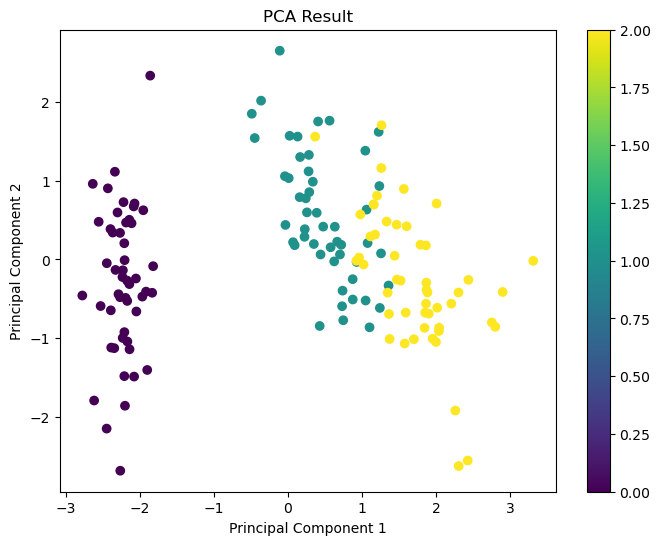

In [1]:

X = data.data
# Step 1: Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Step 2: Compute covariance matrix
covariance_matrix = np.cov(X_standardized.T)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 4: Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select top k eigenvectors (let's say k=2 for 2D)
k = 2
feature_vector = sorted_eigenvectors[:, :k]

# Step 6: Transform data
X_reduced = X_standardized.dot(feature_vector)

# Plotting the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=data.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.colorbar()
plt.show()
